# Employees Sample Database Exploration

https://dev.mysql.com/doc/employee/en/employees-installation.html
https://github.com/datacharmer/test_db

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import os
import warnings
from IPython import display
import pandas_profiling
from config import password
import mysql.connector
from mysql.connector import errorcode

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use(style='ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12, 9]
plt.rcParams['font.size'] = 12
pd.options.display.max_rows = 999
pd.options.display.max_columns = 200
pd.set_option('display.precision', 5)
pd.set_option('expand_frame_repr', True)
warnings.simplefilter('ignore')  

path_directory = os.getcwd()                           # get the current working directory
warnings.simplefilter('ignore')                        # ignore simple warnings

# Import Employees Schema

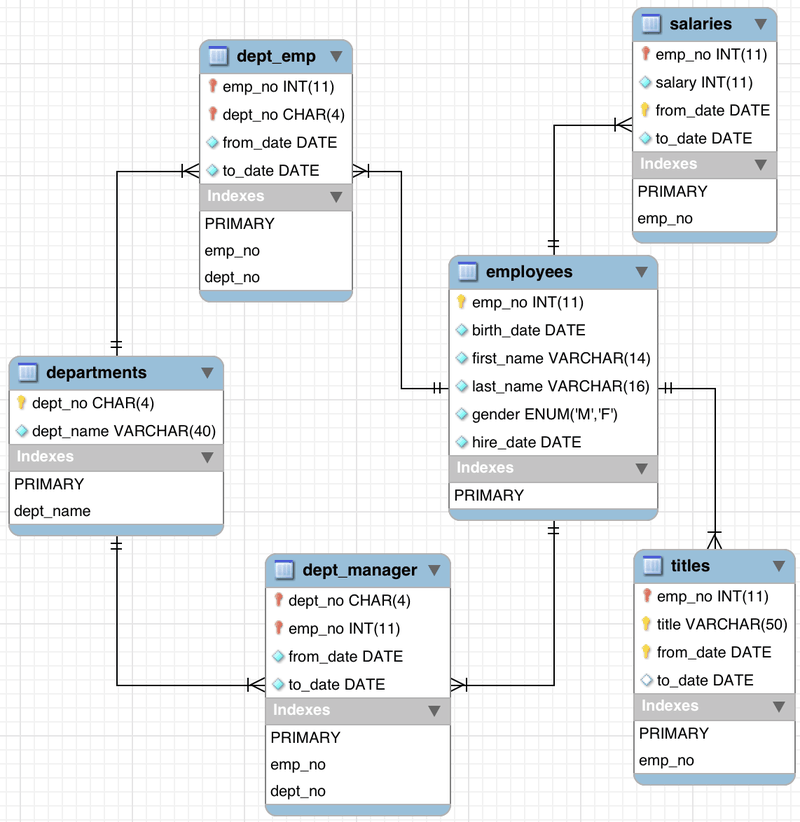

In [3]:
image_path = os.path.join(path_directory, 'images', 'employees-schema.png')

display.Image(image_path)

# Connect To Employees Database

In [4]:
# define connection arguments
config = {
           'user': 'root',
           'password': password,
           'host': '127.0.0.1',
           'database': 'employees',
           'port': 3306,
           'raise_on_warnings': True
         }

# create connection to database
cnx = mysql.connector.connect(**config)

# open a cursor to perform database queries
cur = cnx.cursor(buffered=True)



def extract(sql_query: str):
  '''
  Helper Function For Extracting Data From Employees Database

  Parameters
  ----------

  query: str
    SQL query to execute

  
  Returns

  df: pd.DataFrame
    returns a pandas dataframe
  
  '''
  try:
    cur.execute(sql_query)
    records = cur.fetchall()
    df = pd.DataFrame(data=records)
  except mysql.connector.Error as err:
    if err.errno == errorcode.ER_ACCESS_DENIED_ERROR:
      print('wrong username or password')
    elif err.errno == errorcode.ER_BAD_DB_ERROR:
      print('Database does not exist')
    else:
      print(err)
  else:
    cnx.close()

  return df

# Extract Data

In [5]:
query = '''
            select
	distinct
    e.emp_no,
	e.first_name,
	e.last_name,
	e.gender,
	t.title,
	s.salary,
	de.dept_no,
	d.dept_name
from
	employees e
left join
    titles t on
	e.emp_no = t.emp_no
left join
    salaries s on
	e.emp_no = s.emp_no
left join
    dept_emp de on
	e.emp_no = de.emp_no
left join
    departments d on
	de.dept_no = d.dept_no
group by
	1
order by
	1 asc;
    
         '''

df = extract(query)
df

,0,1,2,3,4,5,6,7
0,10001,Georgi,Facello,M,Senior Engineer,60117,d005,Development
1,10002,Bezalel,Simmel,F,Staff,65828,d007,Sales
2,10003,Parto,Bamford,M,Senior Engineer,40006,d004,Production
3,10004,Chirstian,Koblick,M,Engineer,40054,d004,Production
4,10005,Kyoichi,Maliniak,M,Senior Staff,78228,d003,Human Resources
...,...,...,...,...,...,...,...,...
300019,499995,Dekang,Lichtner,F,Engineer,40000,d004,Production
300020,499996,Zito,Baaz,M,Engineer,58058,d004,Production
300021,499997,Berhard,Lenart,M,Engineer,49597,d005,Development
300022,499998,Patricia,Breugel,M,Senior Staff,40000,d002,Finance


In [6]:
# rename dataframe columns
df.rename(
  columns={
    0 : 'emp_no',
    1 : 'first_name',
    2 : 'last_name',
    3 : 'gender',
    4 : 'title',
    5 : 'salary',
    6 : 'dept_no',
    7 : 'dept_name'
  }, inplace=True
)

df

,emp_no,first_name,last_name,gender,title,salary,dept_no,dept_name
0,10001,Georgi,Facello,M,Senior Engineer,60117,d005,Development
1,10002,Bezalel,Simmel,F,Staff,65828,d007,Sales
2,10003,Parto,Bamford,M,Senior Engineer,40006,d004,Production
3,10004,Chirstian,Koblick,M,Engineer,40054,d004,Production
4,10005,Kyoichi,Maliniak,M,Senior Staff,78228,d003,Human Resources
...,...,...,...,...,...,...,...,...
300019,499995,Dekang,Lichtner,F,Engineer,40000,d004,Production
300020,499996,Zito,Baaz,M,Engineer,58058,d004,Production
300021,499997,Berhard,Lenart,M,Engineer,49597,d005,Development
300022,499998,Patricia,Breugel,M,Senior Staff,40000,d002,Finance


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300024 entries, 0 to 300023
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   emp_no      300024 non-null  int64 
 1   first_name  300024 non-null  object
 2   last_name   300024 non-null  object
 3   gender      300024 non-null  object
 4   title       300024 non-null  object
 5   salary      300024 non-null  int64 
 6   dept_no     300024 non-null  object
 7   dept_name   300024 non-null  object
dtypes: int64(2), object(6)
memory usage: 18.3+ MB


In [8]:
df['gender'].value_counts()

M    179973
F    120051
Name: gender, dtype: int64

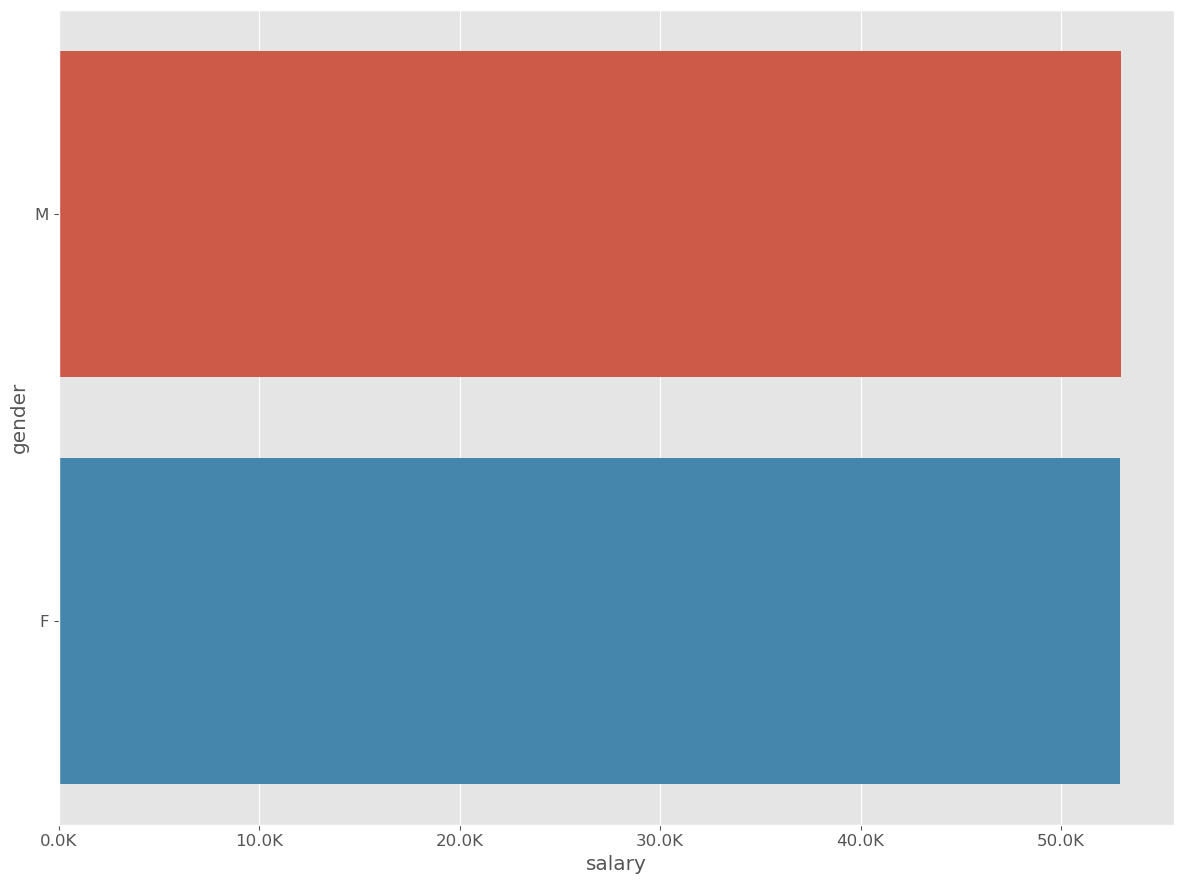

In [9]:
from matplotlib.ticker import FuncFormatter

def format_axis(x, pos):
  return '%1.1fK' % (x * 1e-3)


format = FuncFormatter(format_axis)


f, ax = plt.subplots(1, 1)

sns.barplot(x='salary', y='gender', data=df, ci=False)
ax.xaxis.set_major_formatter(formatter=format_axis)

In [10]:
df['salary'].describe()

count    300024.00000
mean      52970.73245
std       14301.47849
min       40000.00000
25%       40000.00000
50%       48681.00000
75%       61758.00000
max      129492.00000
Name: salary, dtype: float64

<AxesSubplot: xlabel='salary', ylabel='Density'>

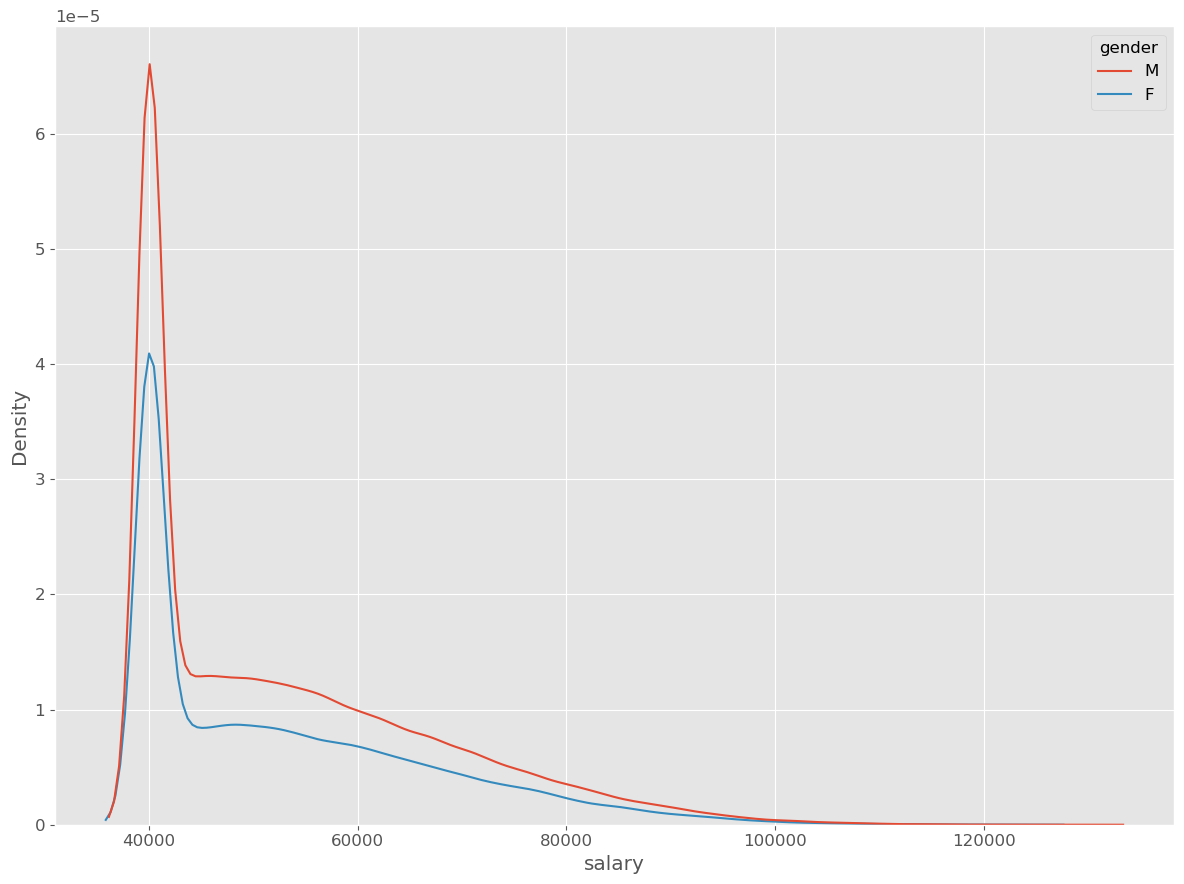

In [11]:
sns.kdeplot(data=df, x='salary', hue='gender')

In [12]:
df.describe(exclude='int')

,first_name,last_name,gender,title,dept_no,dept_name
count,300024,300024,300024,300024,300024,300024
unique,1275,1637,2,7,9,9
top,Shahab,Baba,M,Engineer,d005,Development
freq,295,226,179973,105710,81293,81293


In [13]:
# calculate employee salary by gender and title
df[['gender', 'title', 'salary']].groupby(['gender', 'title']).agg('sum').sort_values(by='salary', ascending=False)

salary
gender title                         
M      Senior Staff        3262547091
       Engineer            3071029213
F      Senior Staff        2169183455
       Engineer            2060959543
M      Staff               1442863845
F      Staff                960091522
M      Senior Engineer      873206788
F      Senior Engineer      581833919
M      Assistant Engineer   445895255
       Technique Leader     439157690
F      Technique Leader     296776020
       Assistant Engineer   287709947
M      Manager                 630134
F      Manager                 606611

<AxesSubplot: title={'center': 'Barplot of Employees Salary'}, xlabel='Employee Name and Number', ylabel='Salary'>

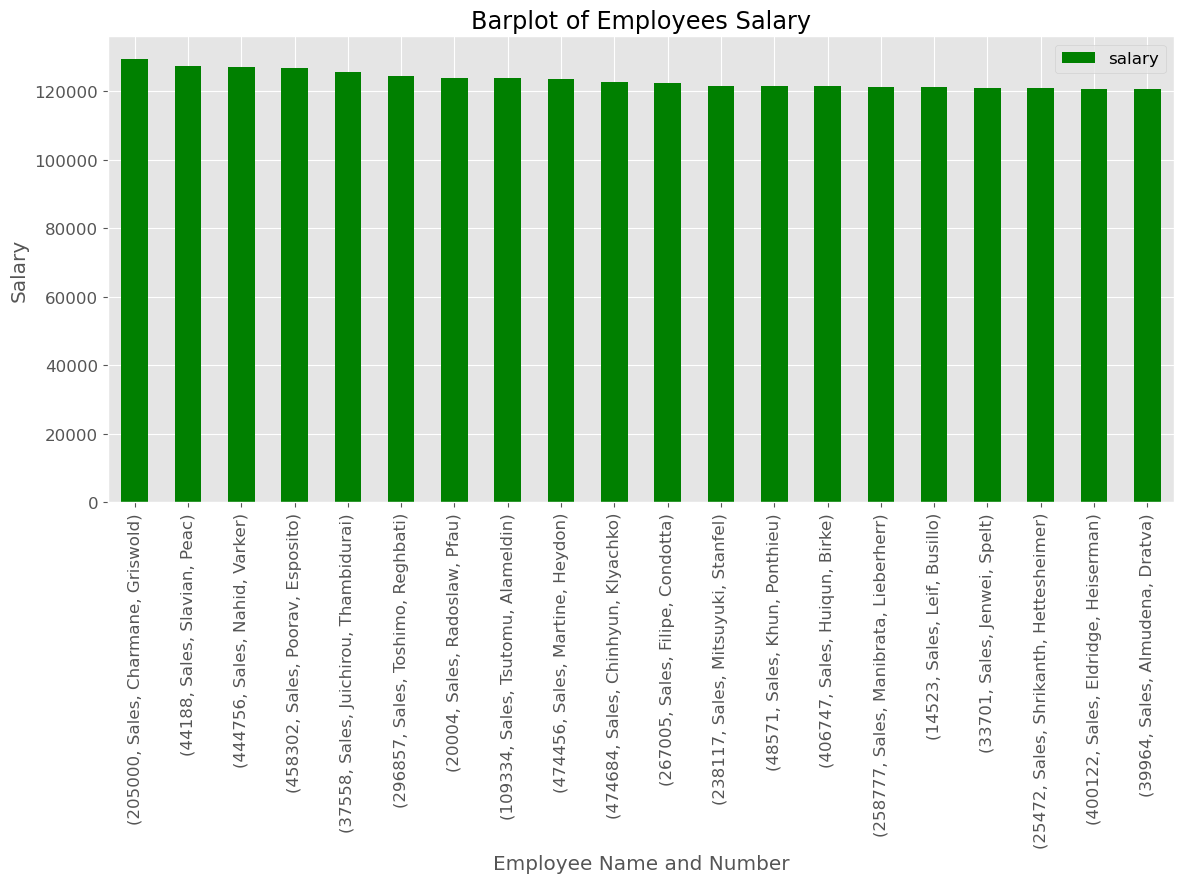

In [14]:
# calculate the highest earning employee for each department
df.drop(columns=['gender', 'title', 'dept_no'])\
  .groupby(['emp_no', 'dept_name', 'first_name', 'last_name'])\
  .agg('sum')\
  .sort_values('salary', ascending=False)[:20]\
  .plot(kind='bar', color='green', xlabel='Employee Name and Number', ylabel='Salary', title='Barplot of Employees Salary')